In [2]:
from keras.layers import Input, Dense, BatchNormalization
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Batch normalizeを追加
encoded = BatchNormalization()(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [8]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s - loss: 0.6687 - val_loss: 0.6340
Epoch 2/50
60000/60000 [==============================] - 6s - loss: 0.4813 - val_loss: 0.3036
Epoch 3/50
60000/60000 [==============================] - 6s - loss: 0.2499 - val_loss: 0.2170
Epoch 4/50
60000/60000 [==============================] - 6s - loss: 0.2076 - val_loss: 0.1941
Epoch 5/50
60000/60000 [==============================] - 6s - loss: 0.1889 - val_loss: 0.1790
Epoch 6/50
60000/60000 [==============================] - 6s - loss: 0.1754 - val_loss: 0.1671
Epoch 7/50
60000/60000 [==============================] - 6s - loss: 0.1644 - val_loss: 0.1572
Epoch 8/50
60000/60000 [==============================] - 6s - loss: 0.1555 - val_loss: 0.1490
Epoch 9/50
60000/60000 [==============================] - 6s - loss: 0.1481 - val_loss: 0.1422
Epoch 10/50
60000/60000 [==============================] - 6s - loss: 0.1418 - val_loss: 0.1365

In [9]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

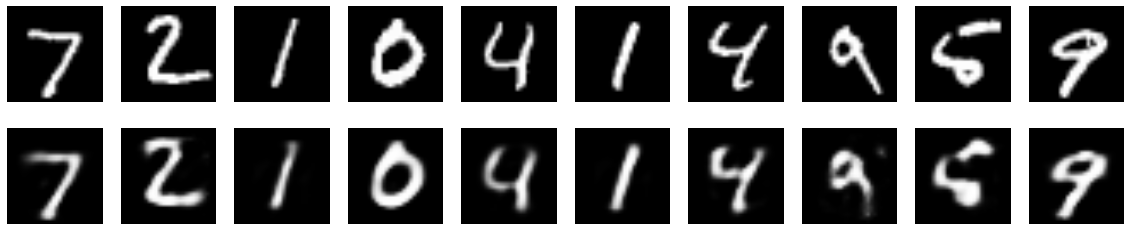

In [10]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

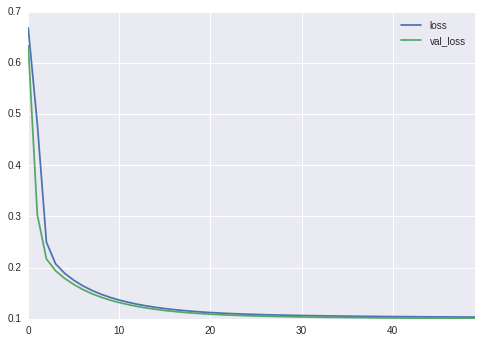

In [11]:
import pandas as pd
import seaborn

# history_dictをpandasnのデータフレームに変換
d = pd.DataFrame(history.history)
# loss, val_lossをプロット
d[['loss', 'val_loss']].plot()
plt.show()

In [14]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 51,120
Trainable params: 51,056
Non-trainable params: 64
_________________________________________________________________
